# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from requests.utils import quote

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city and API key
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhangjiakou


Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | niafunke
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | mahina
Processing Record 11 of Set 1 | minas de marcona
Processing Record 12 of Set 1 | susuman
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | kachug
Processing Record 15 of Set 1 | petropavlovsk-kamchatsky
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | kharan
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | cowra
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | taiohae
City not found. Skipping...
Processing Record 23 of Set 1 | iskateley
Processing Record 24 of Set 1 | vis

In [4]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?q=palopo&appid=f3c2c416f44826e26471ffe5510a1e0e&units=metric


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhangjiakou,40.8100,114.8794,10.84,61,100,1.24,CN,1728431151
1,west island,-12.1568,96.8225,25.99,83,75,6.69,CC,1728431120
2,iqaluit,63.7506,-68.5145,1.85,93,100,4.12,CA,1728431155
3,port-aux-francais,-49.3500,70.2167,1.54,73,99,5.85,TF,1728431156
4,niafunke,15.9322,-3.9906,30.83,49,83,5.41,ML,1728431157


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zhangjiakou,40.8100,114.8794,10.84,61,100,1.24,CN,1728431151
1,west island,-12.1568,96.8225,25.99,83,75,6.69,CC,1728431120
2,iqaluit,63.7506,-68.5145,1.85,93,100,4.12,CA,1728431155
3,port-aux-francais,-49.3500,70.2167,1.54,73,99,5.85,TF,1728431156
4,niafunke,15.9322,-3.9906,30.83,49,83,5.41,ML,1728431157


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

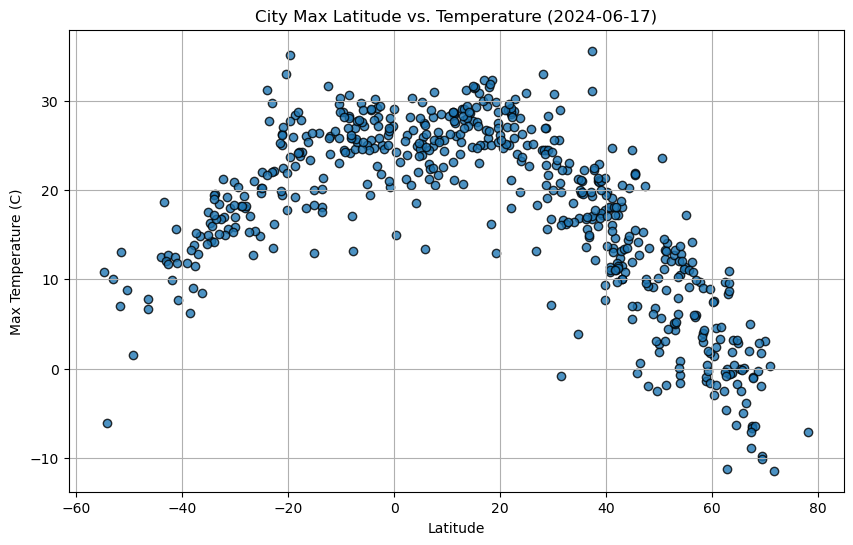

In [9]:

# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

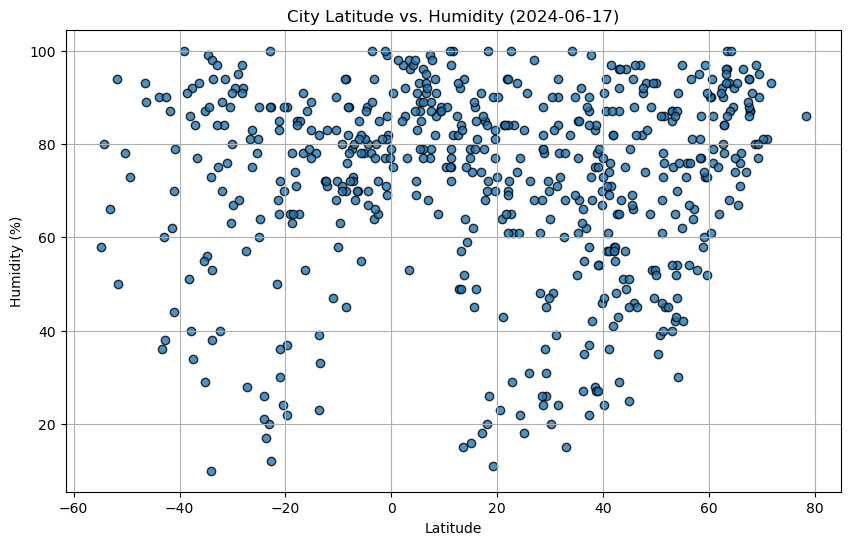

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

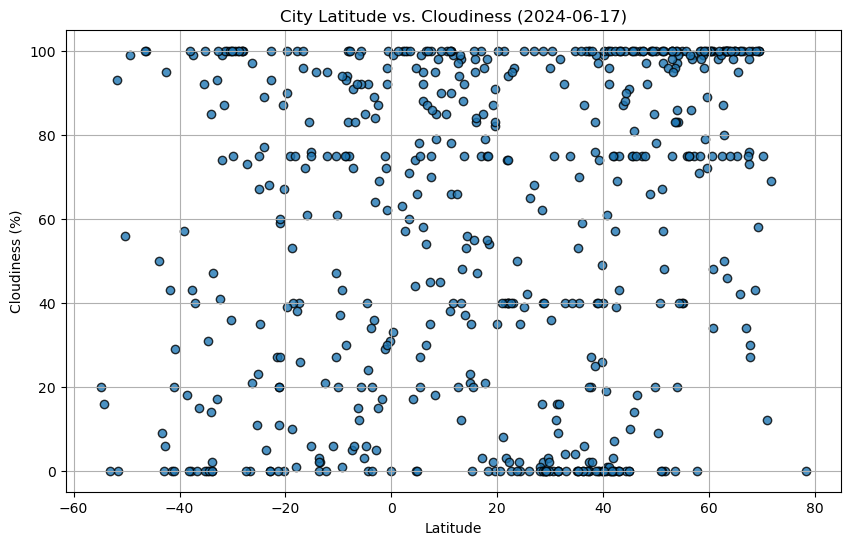

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

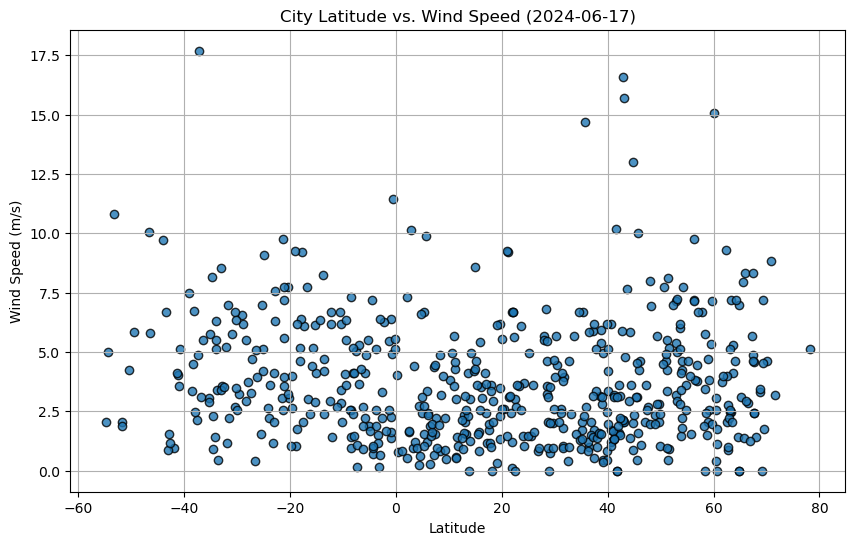

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.8)
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create regression line
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
        
    # Create scatter plot
    plt.figure(figsize=(10,6))
    plt.scatter(x_values, y_values, edgecolors="black", linewidths=1, marker="o", alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the plot with the regression line equation
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Print the r-squared value
    print(f"r^2 value: {r_value**2:.18f}")

    # Set title and labels
    plt.title(f"{title} ({hemisphere})")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show grid and plot
    plt.grid(True)
    plt.show()

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zhangjiakou,40.8100,114.8794,10.84,61,100,1.24,CN,1728431151
2,iqaluit,63.7506,-68.5145,1.85,93,100,4.12,CA,1728431155
4,niafunke,15.9322,-3.9906,30.83,49,83,5.41,ML,1728431157
8,albany,42.6001,-73.9662,12.41,65,69,2.14,US,1728431163
11,susuman,62.7833,148.1667,-11.25,84,50,0.87,RU,1728431166


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12.1568,96.8225,25.99,83,75,6.69,CC,1728431120
3,port-aux-francais,-49.3500,70.2167,1.54,73,99,5.85,TF,1728431156
5,bredasdorp,-34.5322,20.0403,14.27,99,31,2.32,ZA,1728431159
6,adamstown,-25.0660,-130.1015,20.22,60,67,4.18,PN,1728431160
7,edinburgh of the seven seas,-37.0676,-12.3116,12.82,84,40,17.69,SH,1728431162


###  Temperature vs. Latitude Linear Regression Plot

r^2 value: 0.723121579090162170


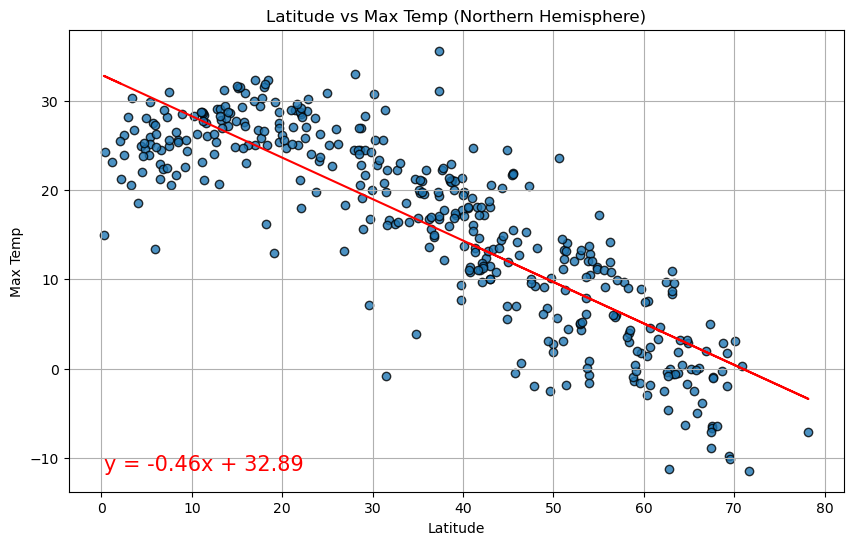

In [67]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Latitude vs Max Temp", "Latitude", "Max Temp", "Northern Hemisphere")


r^2 value: 0.636645385669003638


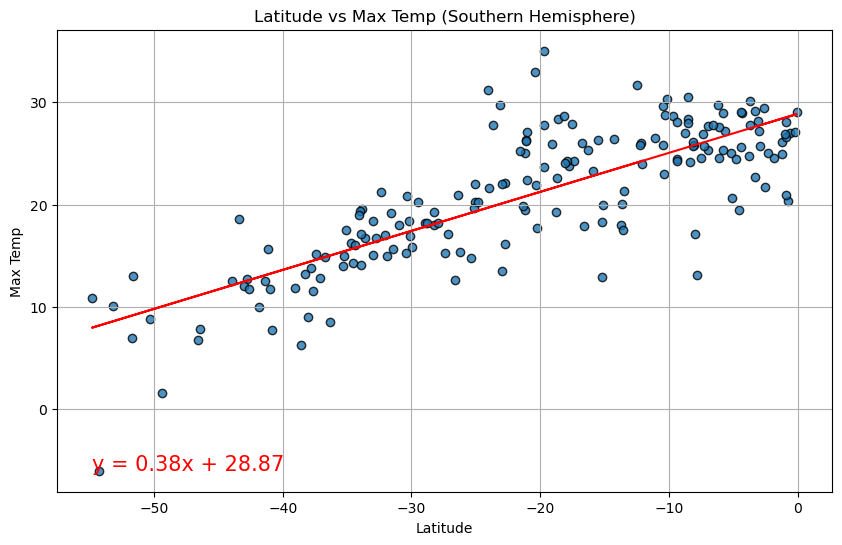

In [68]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Latitude vs Max Temp", "Latitude", "Max Temp", "Southern Hemisphere")

**Latitude-Temperature Relationship:** 
In both hemispheres, temperature is strongly related to latitude, though the direction of the relationship differs. In the Northern Hemisphere, as latitude increases (moving away from the equator), temperatures decrease. In the Southern Hemisphere, as latitude increases (moving closer to the equator), temperatures increase.
This is expected, as proximity to the equator generally leads to higher temperatures, while moving towards the poles leads to colder climates.

The correlation is slightly stronger in the Northern Hemisphere (𝑟^2=0.7231) compared to the Southern Hemisphere (𝑟^2 = 0.6366). This may be due to differences in land and ocean distribution, as well as atmospheric circulation patterns that impact how temperature varies with latitude in each hemisphere.

These findings align with general geographical and climatological principles, showing how temperature tends to decrease with latitude as one moves away from the equator, but with varying strengths of correlation between hemispheres.

### Humidity vs. Latitude Linear Regression Plot

r^2 value: 0.000000879470771200


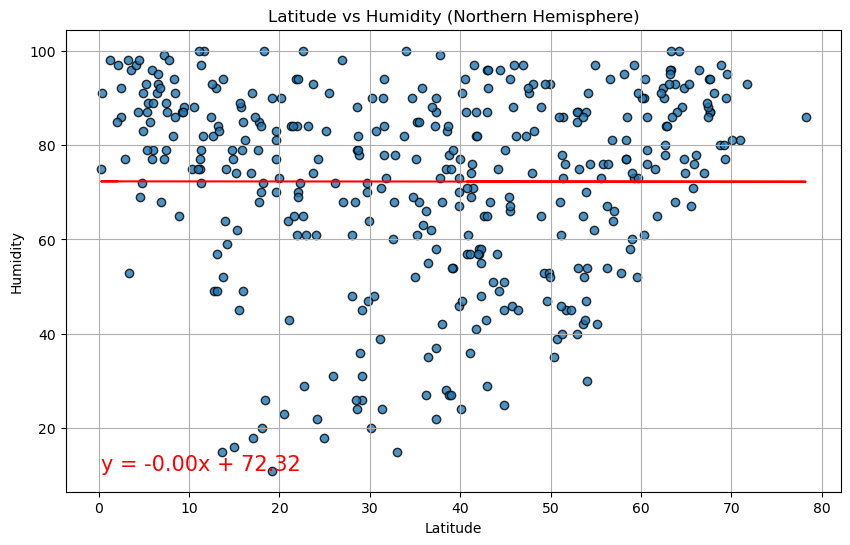

In [69]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Latitude vs Humidity", "Latitude", "Humidity", "Northern Hemisphere")

r^2 value: 0.010677834608211490


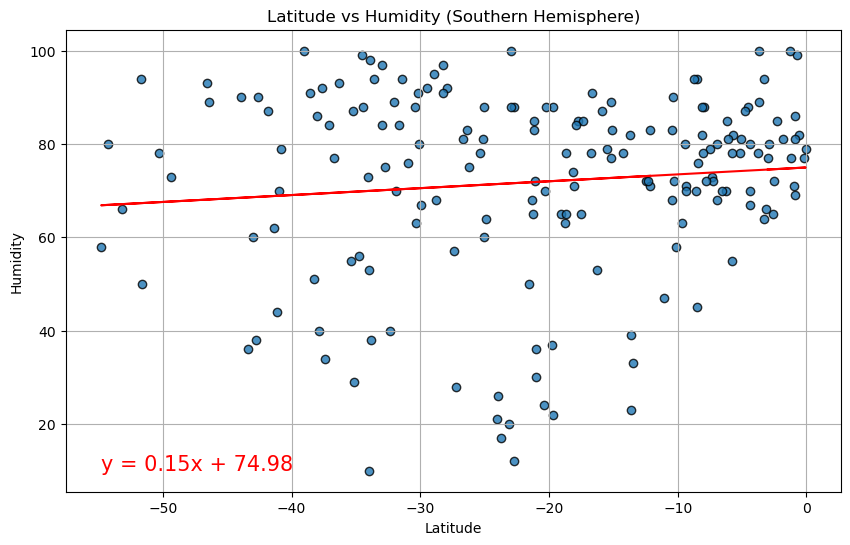

In [70]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Latitude vs Humidity", "Latitude", "Humidity", "Southern Hemisphere")

**Latitude-Humidity Relationship:** 
In both hemispheres, the correlation between latitude and humidity is either extremely weak or non-existent. The almost flat regression line and the near-zero 𝑟^2-values suggest that latitude does not play a major role in determining humidity levels.

Northern Hemisphere:
The humidity values are quite dispersed with little to no discernible pattern. The high 𝑟^2-value close to zero confirms that latitude has no predictive power for humidity in this region.

Southern Hemisphere:
While there is a very slight upward trend in humidity as latitude increases (closer to the equator), the relationship is too weak to make any significant conclusions. The majority of humidity variation seems to be independent of latitude.

In summary, both graphs reveal that humidity is largely unaffected by latitude, with no meaningful relationship between the two in either hemisphere. The scatter suggests that factors other than latitude, such as proximity to large water bodies or local weather systems, likely play a more significant role in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

r^2 value: 0.023090046884325748


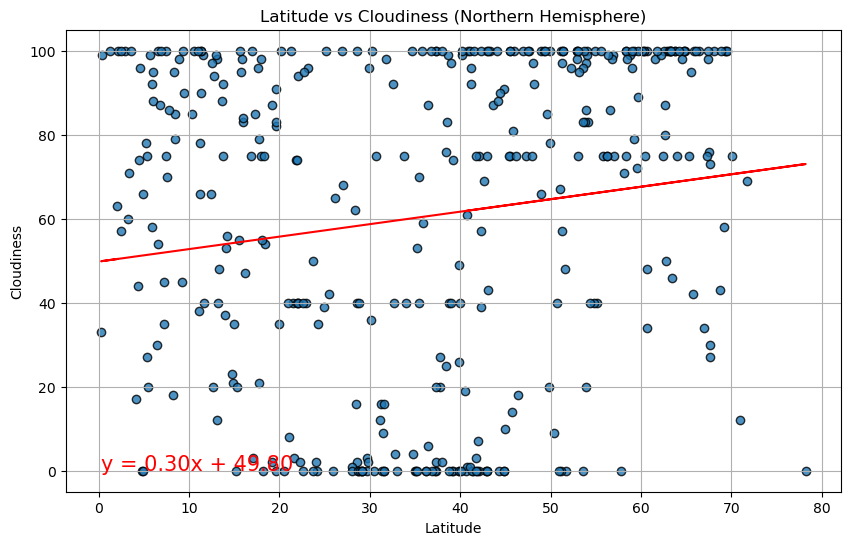

In [71]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Latitude vs Cloudiness", "Latitude", "Cloudiness", "Northern Hemisphere")

r^2 value: 0.004944639626181048


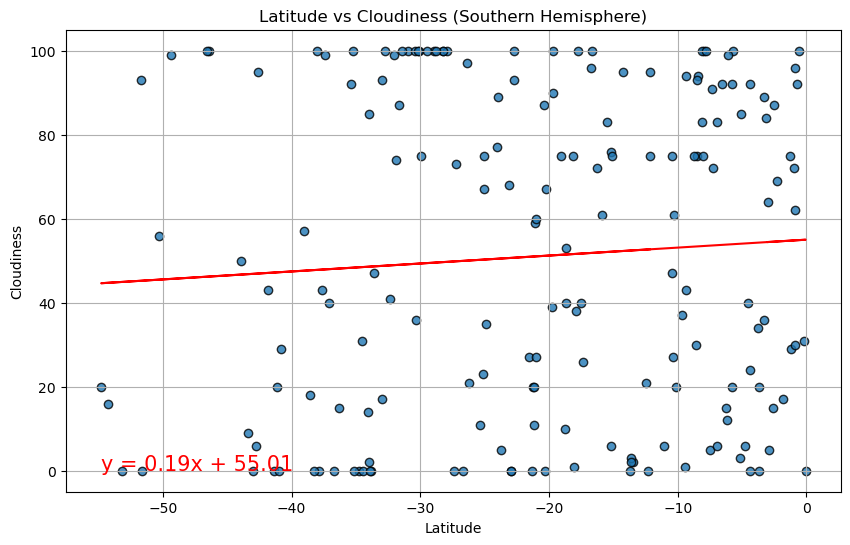

In [72]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Latitude vs Cloudiness", "Latitude", "Cloudiness", "Southern Hemisphere")

**Latitude-Cloudiness Relationship:** 
In both hemispheres, there is a very weak correlation between latitude and cloudiness. The positive slopes indicate that cloudiness tends to increase slightly as you move further from the equator, but the 𝑟^2-values are too low to suggest any meaningful relationship.

Dispersed Data:
The data points are widely dispersed, particularly around high cloudiness values (80-100%). This suggests that factors other than latitude, such as local weather systems or geographic features, are likely driving cloudiness levels in these regions.

Northern vs. Southern Hemisphere:
While the relationship is slightly stronger in the Northern Hemisphere, both hemispheres show that latitude is not a strong predictor of cloudiness. Cloud formation can depend on many localized factors, including air pressure, moisture levels, and proximity to bodies of water.

In conclusion, the analysis reveals that there is no substantial relationship between latitude and cloudiness in either hemisphere. The weak positive correlations suggest that other factors, unrelated to latitude, are likely more important in determining cloudiness levels across different regions.

### Wind Speed vs. Latitude Linear Regression Plot

r^2 value: 0.031692400021630082


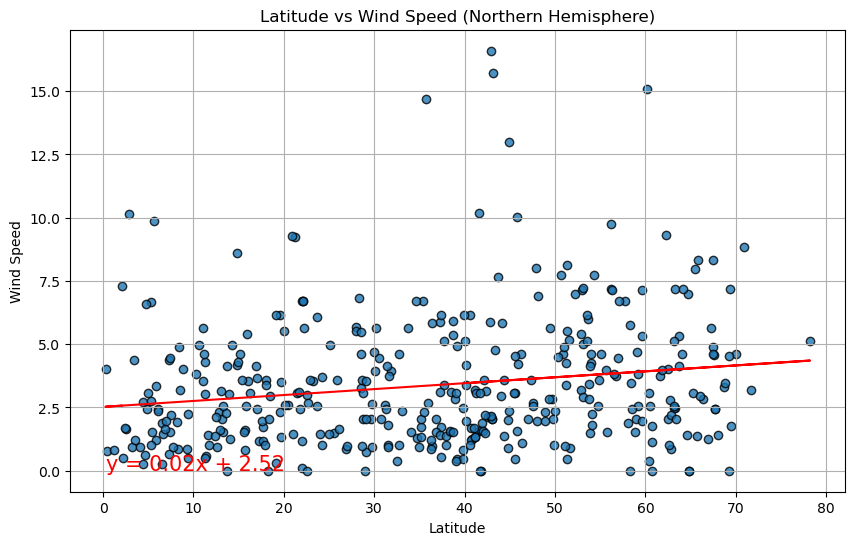

In [73]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Latitude vs Wind Speed", "Latitude", "Wind Speed", "Northern Hemisphere")

r^2 value: 0.026167824680923251


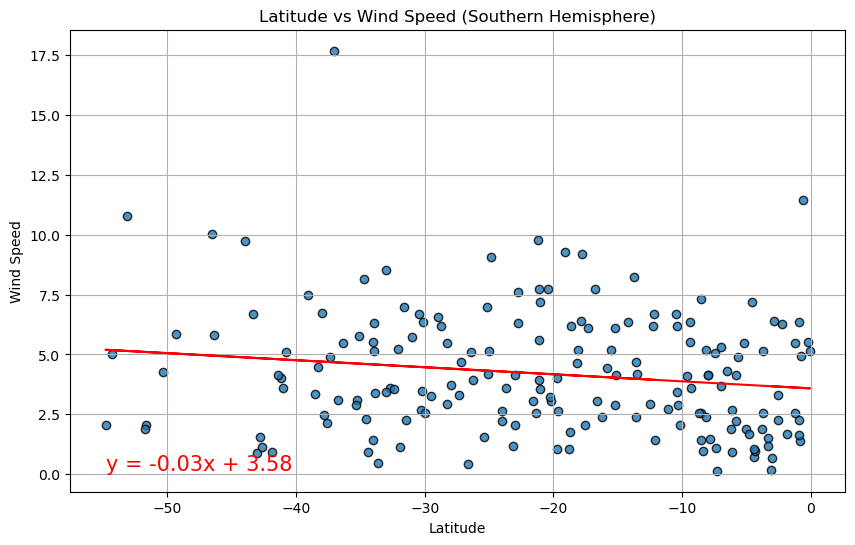

In [74]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Latitude vs Wind Speed", "Latitude", "Wind Speed", "Southern Hemisphere")

**Latitude-Wind Speed Relationship:** 
In both hemispheres, the correlation between latitude and wind speed is weak. The regression lines show only slight changes in wind speed as latitude increases or decreases. The low 𝑟^2-values (both around 3%) confirm that latitude is not a strong predictor of wind speed.

Northern Hemisphere:
The weak positive trend suggests a slight increase in wind speed with latitude, but the data points are widely scattered, and the overall trend is minimal.

Southern Hemisphere:
The slight negative trend indicates a minimal decrease in wind speed as latitude increases, but again, the correlation is too weak to draw any significant conclusions.

In conclusion, the analysis reveals that latitude has little to no influence on wind speed in both hemispheres. Wind speeds are likely influenced by local factors such as geography, atmospheric pressure systems, and regional weather patterns rather than latitude. The weak correlations and low 𝑟^2-values suggest that wind speed is determined by more complex and localized meteorological phenomena.